#### Import Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


from sklearn.compose       import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline      import Pipeline
from sklearn.impute        import SimpleImputer

from sklearn.model_selection  import train_test_split

#### Helper Functions

In [44]:
def plot_auc_and_confusion_matrix(y_true, y_pred_proba, y_pred):
    
    # Calculate ROC curve and AUC
    
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    auc_score            = roc_auc_score(y_true, y_pred_proba)
    
    # Plot AUC Curve
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', label='AUC = {:.2f}'.format(auc_score))
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC Curve')
    plt.legend(loc='lower right')
    
    # Plot Confusion Matrix
    plt.subplot(1, 2, 2)
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=plt.gca(), cmap='Blues')
    plt.title('Confusion Matrix')
    
    plt.tight_layout()
    plt.show()

    # Print Classification Report
    print("Classification Report:\n")
    print(classification_report(y_true, y_pred))


In [45]:
# Import data

df = pd.read_csv('https://raw.githubusercontent.com/NUELBUNDI/Machine-Learning-Data-Set/main/bank_churn_dataset.csv')

In [46]:
df.head(2)

,Unnamed: 0,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,0,1,3135,66,Male,0.0,self_employed,187.0,2,755,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,1,2,310,35,Male,0.0,self_employed,NaN,2,3214,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0


In [47]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [48]:
# Target Feature Vs Input Features

X = df.drop(columns=['churn'])
y = df['churn']

#### Data Preprocessing stage

In [49]:
categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()
numeric_features     = X.select_dtypes(include=['int64','float64']).columns.tolist()


In [50]:
numeric_transformer = Pipeline(steps=[
                                        ('imputer', SimpleImputer(strategy='median')),
                                        ('scaler', StandardScaler())
                                    ])

# Preprocessor for categorical data
categorical_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                ])

# Combine preprocessing for both types of data
preprocessor = ColumnTransformer(
                                transformers=[
                                    ('num', numeric_transformer, numeric_features),
                                    ('cat', categorical_transformer, categorical_features)
                                ]
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

numeric_feature_names = numeric_features  # These are directly used without modification
categorical_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)
X_processed_df    = pd.DataFrame(X_processed, columns=all_feature_names) # Convert the transformed data back to a DataFrame

X_processed_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
X_processed_df.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,previous_month_balance,gender_Female,gender_Male,gender_missing,occupation_company,occupation_missing,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,-1.731304,0.478644,0.999147,-0.330877,-1.429857,-0.341489,-0.182318,1.927027,-0.139017,-0.141953,...,-0.142265,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.731190,-1.275909,-0.741756,-0.330877,0.086278,-0.341489,2.439824,-0.066312,-0.046720,0.028425,...,0.030459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.730961,-0.005178,-0.966389,-0.330877,-1.525933,-0.341489,-0.943689,-0.430947,-0.081398,-0.039514,...,-0.057152,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.730847,-1.171568,2.346943,-0.330877,0.522137,-0.341489,-0.366796,0.991130,-0.119457,-0.122361,...,-0.137290,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.730733,0.103512,-0.348649,1.756001,1.632875,1.172672,-0.573667,-0.090621,-0.151482,-0.143293,...,-0.137116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [66]:
clf_tree = DecisionTreeClassifier(max_depth=4)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

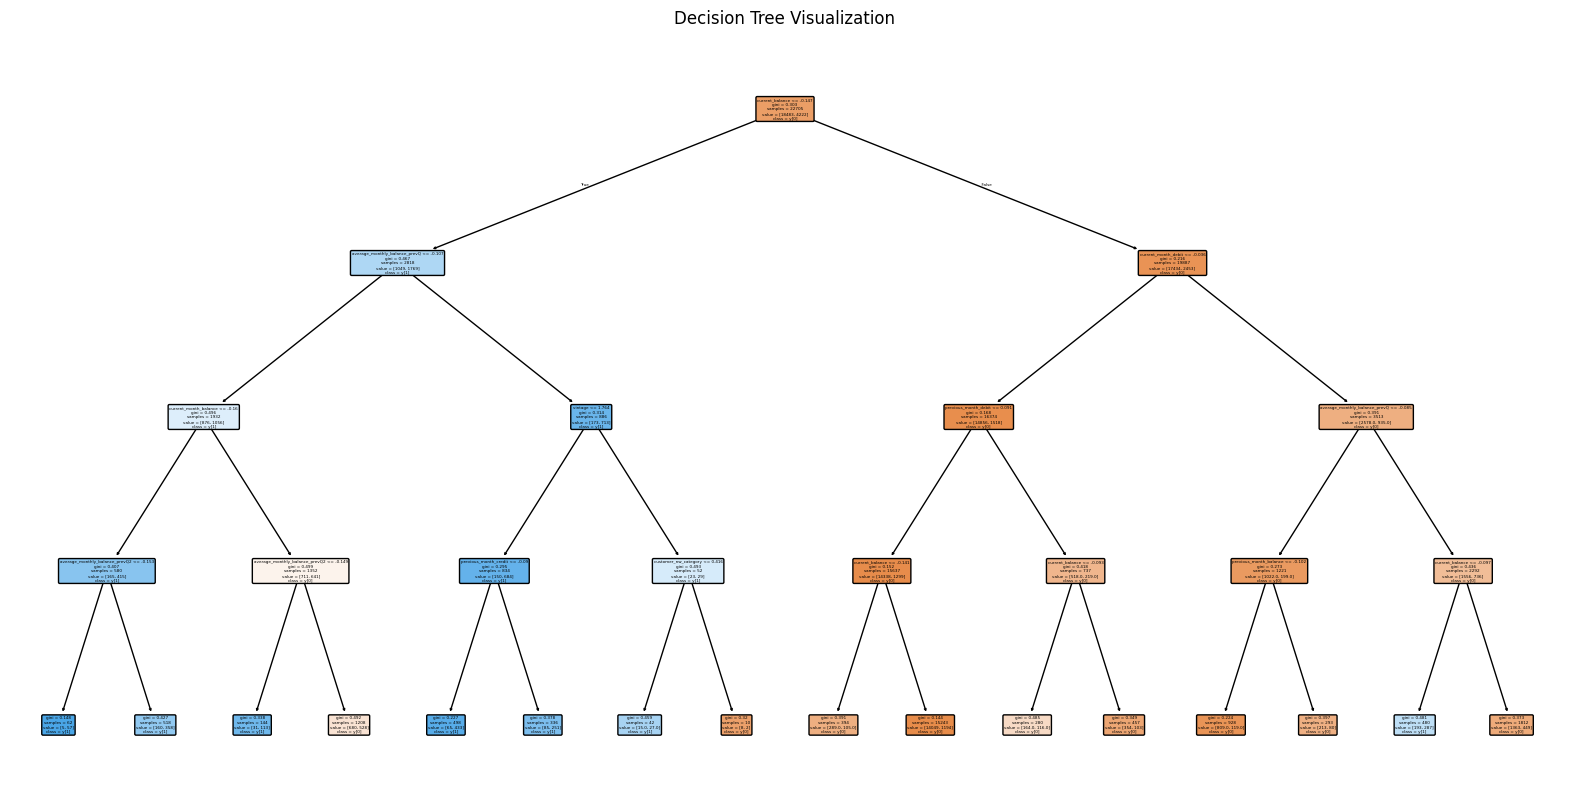

In [67]:
# Step 2: Visualize the Decision Tree
plt.figure(figsize=(20, 10))  # Adjust the size of the plot to better view the tree
plot_tree(clf_tree, feature_names=all_feature_names, filled=True, class_names=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [68]:
# Step 4: Estimating Class Probabilities
y_proba_tree = clf_tree.predict_proba(X_train)
y_proba_tree

array([[0.92166896, 0.07833104],
       [0.75220751, 0.24779249],
       [0.56291391, 0.43708609],
       ...,
       [0.92166896, 0.07833104],
       [0.92166896, 0.07833104],
       [0.92166896, 0.07833104]])

In [69]:
# Step 4: Estimating Class Probabilities and Predictions
y_proba_tree = clf_tree.predict_proba(X_train)  # Probabilities
y_pred_tree = clf_tree.predict(X_train)         # Final decisions (0 or 1)

In [73]:
# Combine probabilities and predictions into a DataFrame for better visualization

results_df = pd.DataFrame({
    'Class 0 Probability': y_proba_tree[:, 0],
    'Class 1 Probability': y_proba_tree[:, 1],
    'Predicted Class': y_pred_tree
})

results_df

,Class 0 Probability,Class 1 Probability,Predicted Class
0,0.921669,0.078331,0
1,0.752208,0.247792,0
2,0.562914,0.437086,0
3,0.733503,0.266497,0
4,0.585714,0.414286,0
...,...,...,...
22700,0.921669,0.078331,0
22701,0.562914,0.437086,0
22702,0.921669,0.078331,0
22703,0.921669,0.078331,0


In [74]:
# Step 4: Estimating Class Probabilities
y_proba_tree = clf_tree.predict_proba(X_train)  # Probabilities

threshold = 0.6 # Define a custom threshold (e.g., 0.6 for class 1)



y_pred_custom_threshold = (y_proba_tree[:, 1] >= threshold).astype(int) # Apply the custom threshold: if the probability of class 1 is greater than the threshold, predict 1, otherwise 0

# Combine probabilities and new predictions into a DataFrame
results_df = pd.DataFrame({
    'Class 0 Probability': y_proba_tree[:, 0],
    'Class 1 Probability': y_proba_tree[:, 1],
    'Predicted Class (Custom Threshold)': y_pred_custom_threshold
})

# Show the first 10 examples
results_df.head(10)

,Class 0 Probability,Class 1 Probability,Predicted Class (Custom Threshold)
0,0.921669,0.078331,0
1,0.752208,0.247792,0
2,0.562914,0.437086,0
3,0.733503,0.266497,0
4,0.585714,0.414286,0
5,0.402083,0.597917,0
6,0.921669,0.078331,0
7,0.921669,0.078331,0
8,0.752208,0.247792,0
9,0.921669,0.078331,0


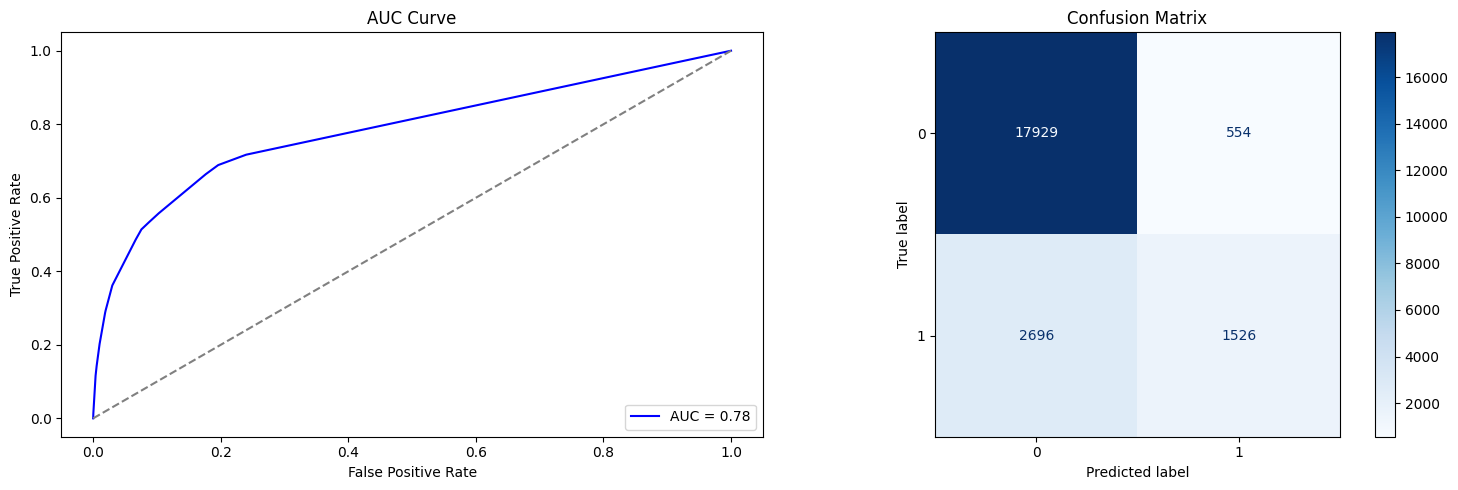

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     18483
           1       0.73      0.36      0.48      4222

    accuracy                           0.86     22705
   macro avg       0.80      0.67      0.70     22705
weighted avg       0.84      0.86      0.84     22705



In [75]:
y_pred_proba = clf_tree.predict_proba(X_train)[:, 1]  # Probabilities for class 1
y_pred      = clf_tree.predict(X_train)  # Predicted classes

# Step 2: Evaluate using the custom function
plot_auc_and_confusion_matrix(y_train, y_pred_proba, y_pred)